# Homework 4

Student Name: Evan Sayer

Student UT EID: ets756

Partner Name: Tyler Smedley

Partner UT EID: tws933

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [62]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [63]:
col_names = ['medallion', 'hack_license', 'pickup_datetime', 'dropoff_datetime', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
             'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']
df = pd.read_csv('nyc-taxi-data.csv.bz2', names=col_names, header=None)

df = df.drop(df[(df['trip_distance'] < 1) & (df['fare_amount'] > 20)].index)


In [64]:
# Convert pickup and dropoff datetime from object to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


# Remove outliers based on quantiles for fare amount and trip distance
fare_amount_q99 = df['fare_amount'].quantile(0.99)
trip_distance_q99 = df['trip_distance'].quantile(0.99)
df = df[(df['fare_amount'] <= fare_amount_q99) & (df['trip_distance'] <= trip_distance_q99)]



## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

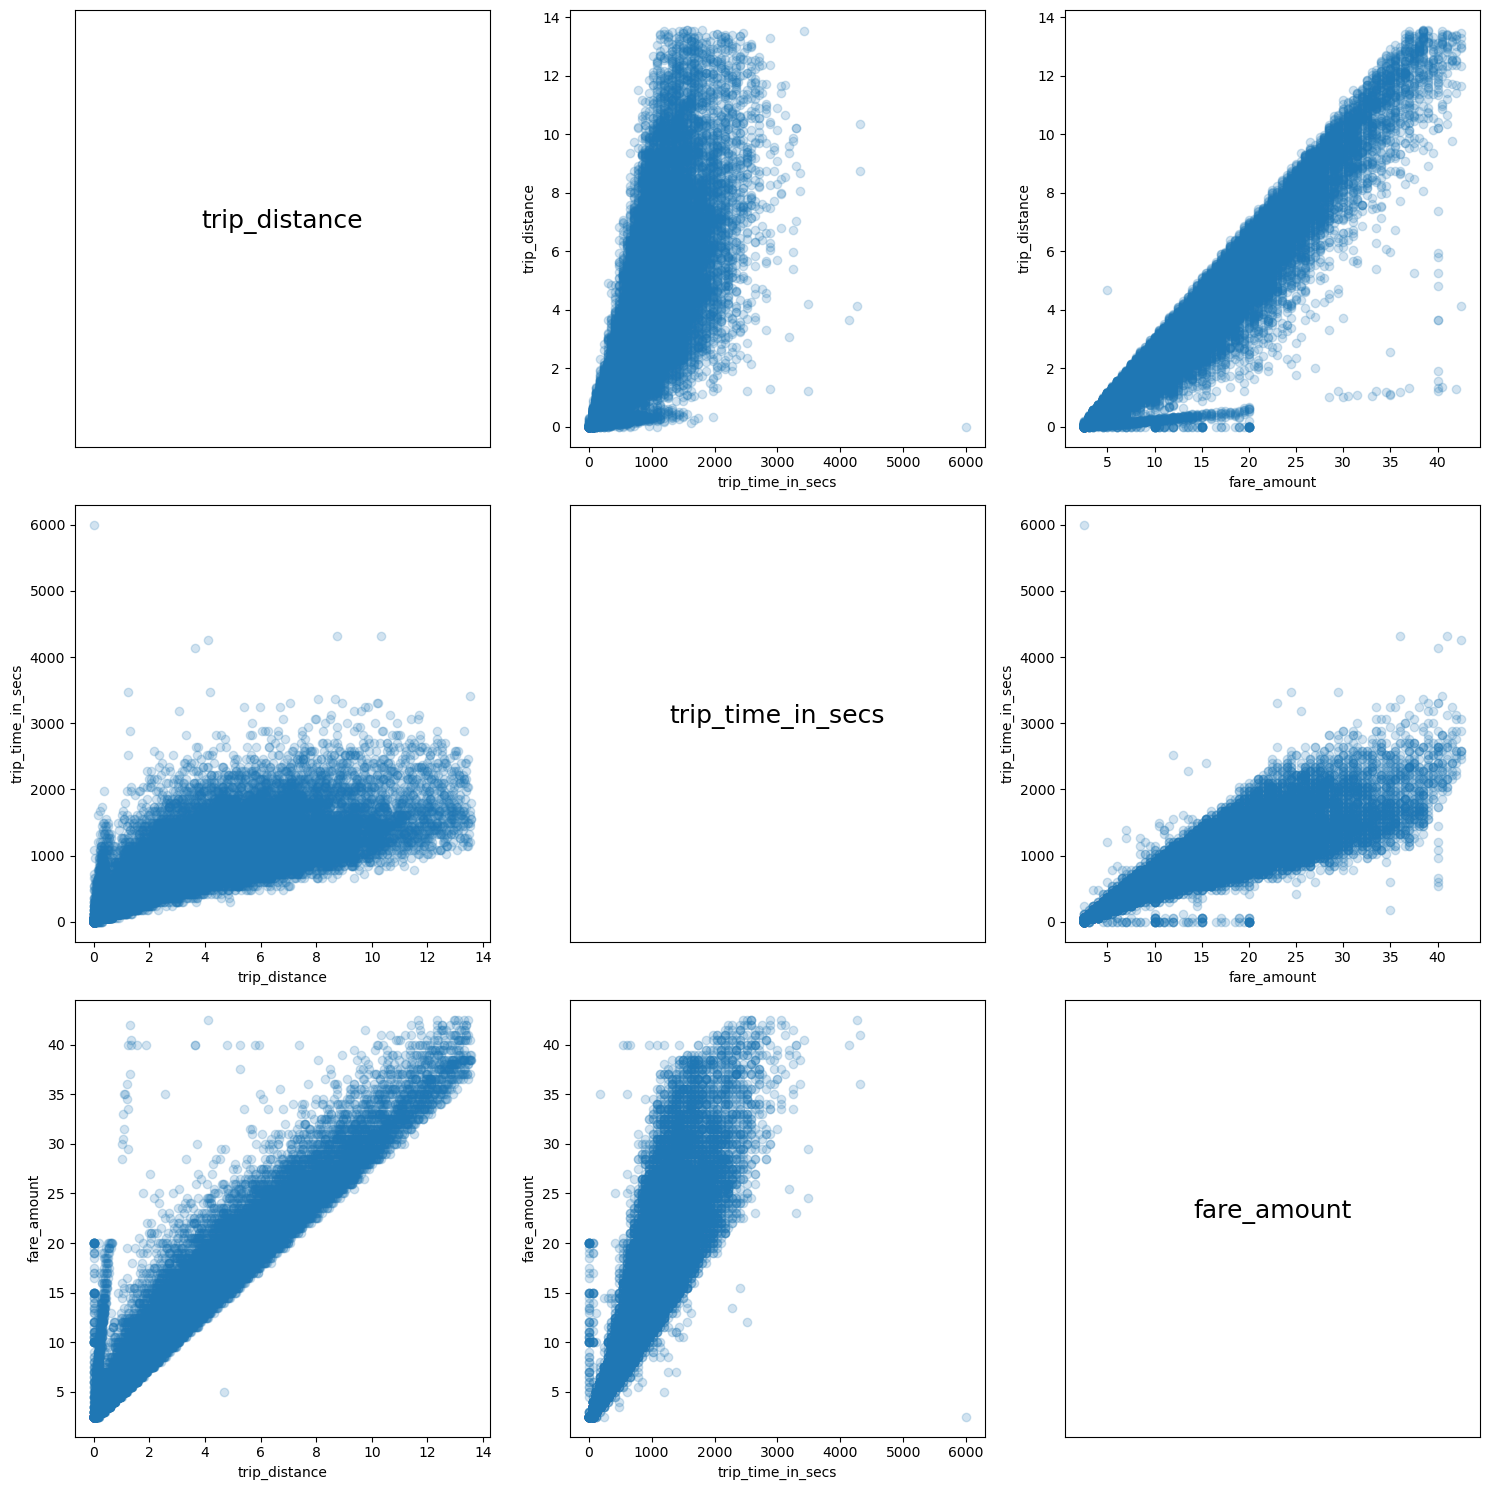

In [65]:
# Calculate correlations
correlations = df[['trip_distance', 'trip_time_in_secs', 'fare_amount']].corr()

# Visualize the correlations in a Scatterplot matrix using Matplotlib
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Names of the variables
variables = ['trip_distance', 'trip_time_in_secs', 'fare_amount']

for i in range(3):
    for j in range(3):
        if i == j:
            ax[i, j].text(0.5, 0.5, variables[i], fontsize=18, ha='center')
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
        else:
            ax[i, j].scatter(df[variables[j]], df[variables[i]], alpha=0.2)
            ax[i, j].set_xlabel(variables[j])
            ax[i, j].set_ylabel(variables[i])

plt.tight_layout()
plt.show()

* Trip Distance and Fare Amount: There is  a positive correlation between trip distance and fare amount. This means as the trip distance increases, the fare amount tends to increase as well. This relationship is intuitive since longer trips usually cost more.

* Trip Distance and Travel Time: This pair is also a positive correlation. Longer trips in terms of distance will generally take more time, assuming constant traffic conditions and speed.

* Travel Time and Fare Amount: Similar to trip distance, there exists a positive correlation between travel time and fare amount. Longer travel times, which can result from longer distances or slower speeds due to traffic, tend to result in higher fares.

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

/home/tylers/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


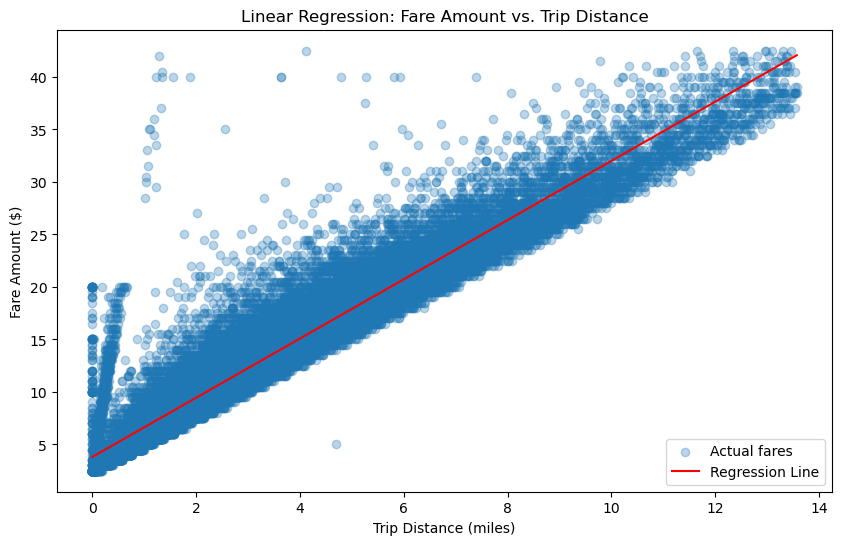

Coefficient: 2.819900062542329, Intercept: 3.8088865257289264
Predicted fare amount for a 3 miles trip: $12.27


/home/tylers/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
# Prepare the data
X = df[['trip_distance']]
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions for visualization
X_vis = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generating points for prediction line
y_pred = model.predict(X_vis)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Actual fares')  # Actual data points
plt.plot(X_vis, y_pred, color='red', label='Regression Line')  # Regression line
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Linear Regression: Fare Amount vs. Trip Distance')
plt.legend()
plt.show()

# Regression coefficients and prediction for a 3 miles trip
print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")
predicted_fare = model.predict([[3]])
print(f"Predicted fare amount for a 3 miles trip: ${predicted_fare[0]:.2f}")

Linear Regression Equation: fare_amount = (coefficient * trip_distance) + intercept

This equation models the relationship between the fare amount (dependent variable) and the trip distance (independent variable), where 'coefficient' represents the increase in fare amount for each unit increase in trip distance, and 'intercept' represents the base fare amount when the trip distance is zero.

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [67]:
# Prepare the data with an additional feature - trip_time_in_secs
X_multi = df[['trip_distance', 'trip_time_in_secs']]
y_multi = df['fare_amount'] + df['surcharge'] + df['tip_amount'] + df['tolls_amount']

# Fit the multiple linear regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Regression coefficients
print(f"Coefficients: {model_multi.coef_}, Intercept: {model_multi.intercept_}")

# Predict the total amount for a 3 miles trip and 6 min travel time
predicted_total_amount = model_multi.predict([[3, 6*60]])
print(f"Predicted total amount for a 3 miles, 6 min trip: {predicted_total_amount[0]}")


Coefficients: [2.20141811 0.00596343], Intercept: 2.83887258905375
Predicted total amount for a 3 miles, 6 min trip: 11.589961555753638


/home/tylers/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Multiple Linear Regression Equation: total_amount = (coefficient1 * trip_distance) + (coefficient2 * travel_time) + intercept

In this model, 'total_amount' is the dependent variable we aim to predict, 'trip_distance' and 'travel_time' are the independent variables, 'coefficient1' and 'coefficient2' represent how much the total amount changes with one unit change in trip distance and travel time, respectively, and 'intercept' represents the total amount when both trip distance and travel time are zero.

## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

Theta after Gradient Descent: [1.24297718 3.35773122]


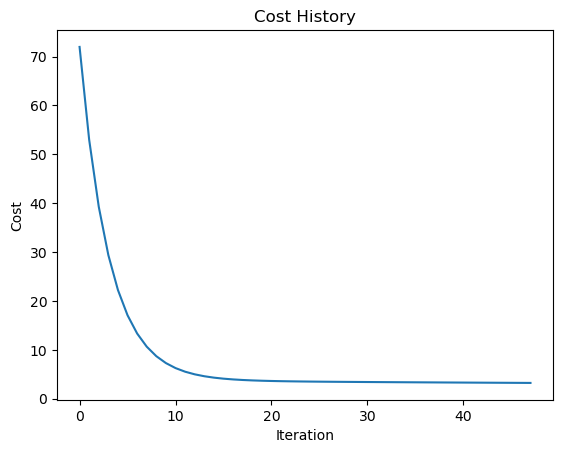

In [68]:
# Initialize parameters
learning_rate = 0.01
iterations = 400
m = len(y_train)
theta = np.zeros(2)  # For intercept and slope

# Cost function
def compute_cost(X_b, y, theta):
    return np.sum(np.square(X_b.dot(theta) - y)) / (2 * m)

# Gradient descent
X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
cost_history = []

for iteration in range(iterations):
    gradients = X_b.T.dot(X_b.dot(theta) - y_train) / m
    theta = theta - learning_rate * gradients
    cost = compute_cost(X_b, y_train, theta)
    cost_history.append(cost)
    if iteration > 0 and abs(cost_history[-2] - cost) < 0.01:
        break

# Final parameters
print(f"Theta after Gradient Descent: {theta}")

# Plot the cost history
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()